# Network
Working with NetworkX and Gephi

In [18]:
import networkx as nx
import matplotlib.pyplot as plt
import random
import seaborn as sns
import numpy as np
import collections

### Network Types

* Undirected networks

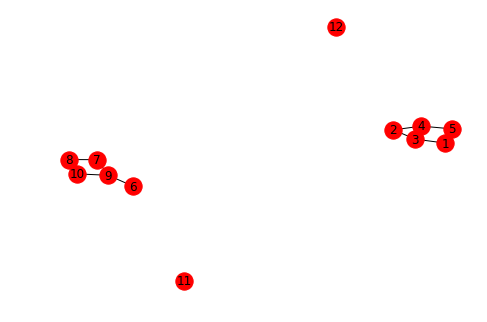

In [2]:
# Making graph
G = nx.Graph()

# Adding the nodes
G.add_node(1)
G.add_nodes_from([2,3,4,5])
G.add_node(6)
G.add_nodes_from([7,8,9,10])
G.add_node(11)
G.add_node(12)

# Adding the edges
G.add_edge(1,3)
G.add_edge(*(1,5))
G.add_edges_from([(2,4), (4,5), (3,4), (10,9), (2,3)])
G.add_edges_from([(7,9), (7,8), (8,10), (6,9)])

# Visualization
nx.draw(G, with_labels=True)
# nx.draw_kamada_kawai(G, with_labels=True)
# nx.draw_networkx(G, with_labels=True)
# nx.draw_random(G, with_labels=True)
# nx.draw_shell(G, with_labels=True)
# nx.draw_spectral(G, with_labels=True)
# nx.draw_spring(G, with_labels=True)
plt.show()

* Network with attribute

In [3]:
# Node attribute
G =nx.Graph()
G.add_edges_from([(1,2),(1,3),(2,3),(4,5),(5,6),(7,8),(3,6),(4,8)])
# G.nodes is the method to associate an attribute to an existing node 
for i in G.nodes:
    if i%2 == 0:
        G.nodes[i]["colour"] = "Red"
    else:
        G.nodes[i]["colour"] = "Blue"
    G.nodes[i]["name"] = f'Node {i}'

G.add_node(9,colour="Yellow")
G.nodes.data()

NodeDataView({1: {'colour': 'Blue', 'name': 'Node 1'}, 2: {'colour': 'Red', 'name': 'Node 2'}, 3: {'colour': 'Blue', 'name': 'Node 3'}, 4: {'colour': 'Red', 'name': 'Node 4'}, 5: {'colour': 'Blue', 'name': 'Node 5'}, 6: {'colour': 'Red', 'name': 'Node 6'}, 7: {'colour': 'Blue', 'name': 'Node 7'}, 8: {'colour': 'Red', 'name': 'Node 8'}, 9: {'colour': 'Yellow'}})

In [4]:
# Edge attribute
G =nx.Graph()
G.add_edges_from([(u,random.randint(1,11),{"weight": random.uniform(1,10), "colour":random.choice(["Red", "Blue"])}) for u in  range(1,10)])
G.edges.data()

EdgeDataView([(1, 9, {'weight': 3.9348329012957137, 'colour': 'Red'}), (1, 4, {'weight': 8.134692076381352, 'colour': 'Red'}), (1, 5, {'weight': 9.152889162326813, 'colour': 'Blue'}), (9, 3, {'weight': 7.822768349248358, 'colour': 'Red'}), (9, 2, {'weight': 6.77019191922523, 'colour': 'Blue'}), (2, 8, {'weight': 6.137420882466546, 'colour': 'Red'}), (8, 5, {'weight': 8.508387040393384, 'colour': 'Blue'}), (5, 6, {'weight': 1.7878074055111326, 'colour': 'Blue'}), (7, 10, {'weight': 1.9779236912107696, 'colour': 'Blue'})])

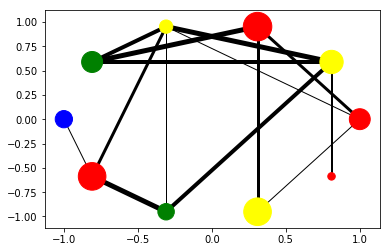

In [5]:
# Visualization based on attributes
# Here, we added size & colour to the nodes and weight to the edges
G = nx.generators.random_graphs.fast_gnp_random_graph(10,0.25)
edgeWeights = [random.randint(1,5) for i in range(10)]
nodeSize = [random.randint(1,1000) for i in range(10)]
nodeColour = [random.choice(["r","b", "green", "yellow"]) for i in range(10)]


pos = nx.circular_layout(G)
nx.draw_networkx_nodes(G, pos, node_size=nodeSize, node_color=nodeColour)
nx.draw_networkx_edges(G, pos, width=edgeWeights)
plt.show()

* Directed networks

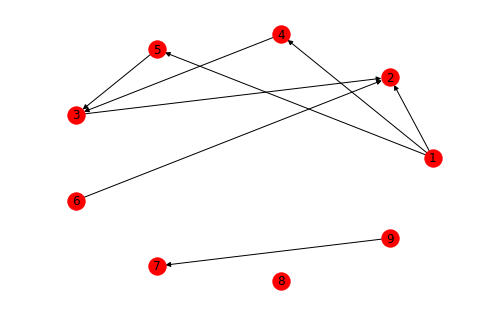

In [6]:
DG = nx.DiGraph()
DG.add_edge(1,2)
DG.add_edges_from([(1,4),(1,5),(5,3)])
DG.add_edge(3,2)
DG.add_edges_from([(4,3),(6,2)])
DG.add_nodes_from([7,8,9])
DG.add_edge(9,7)
nx.draw_circular(DG, with_labels=True)
plt.show()

So far, we reviewed three important types of networks (i) undirected, (ii) weighted and (iii) directed networks. Also, we saw how networks with different properties can be visualized. In the next step, we look at some metrics in networks. But before that, as a conclusion to this part (without looking at the answer) try to solve challenge 1

### Challenge 1
Make a random directed graph with 50 nodes and give a random weight from 1 to 10 to each edge. Then visualize the graph regarding two following conditions:
1- The size of the nodes should be associated with the nodes degree
2- The thickness of each edge should be associted with edge weights
3- The colour of nodes has to be associated with their degree in a way that as the degree of a node increases the colour of that node becomes more sharp
3- The colour of edges has to be associated with their weights in a way that as the weight of an edge increases the colour of that edge becomes more sharp

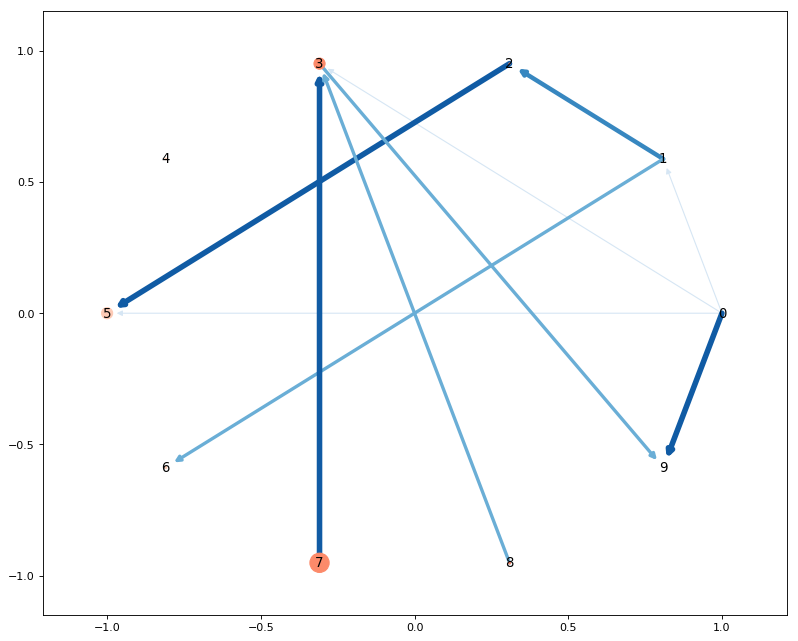

In [7]:
G = nx.erdos_renyi_graph(10, 0.1, directed=True)
inDeg = dict(G.in_degree())
outDeg = dict(G.out_degree())
for edge in G.edges:
    G[edge[0]][edge[1]]["weight"] = random.randint(1,5)
edgeWeights = [u[2]["weight"] for u in G.edges.data()]

# Making the colour palette and linking it the edges according to theor weights
colourPalette = sns.color_palette("Blues",5)
edgeWeighColour = dict(zip(range(1,6),colourPalette))
for edge in G.edges:
    G[edge[0]][edge[1]]["colour"] = edgeWeighColour[G[edge[0]][edge[1]]["weight"]]
edgeColours = [u[2]["colour"] for u in G.edges.data()]   

# Associating the color of the nodes with the their out-degree
outDegUnique = np.unique([i for i in outDeg.values()])
colourPalette = sns.color_palette("Reds",len(outDegUnique))
nodeOutDegDict = dict(zip(outDegUnique,colourPalette))
for i in G.nodes:
    G.nodes[i]["colour"] = nodeOutDegDict[outDeg[i]]
nodeColour = [i[1]["colour"] for i in G.nodes.data()]
    
# This line makes the figure bigger
plt.figure(num=None, figsize=(12, 10), dpi=80)

# Setting the layout, nodes, edges and lables
pos = nx.circular_layout(G)
nx.draw_networkx_nodes(G, pos, node_size=[(u,100*inDeg[u]) for u in inDeg], node_color=nodeColour)
nx.draw_networkx_edges(G, pos, width=edgeWeights, edge_color=edgeColours)
nx.draw_networkx_labels(G, pos)

# Drawing the network
plt.show()

### Visualization

### Node metrics

* Degrees and degree distribution

In [192]:
# Since then, in some sections we work with existing networks. So, here we load a couple of different networks to be able to use them during our workshop

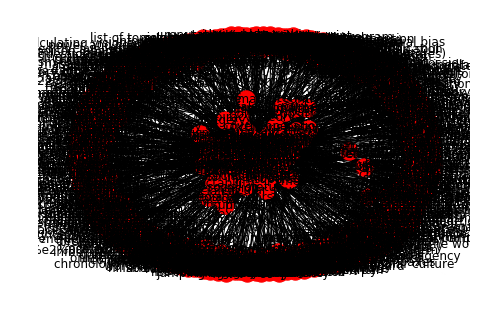

In [193]:
# This is the network of fake-news related concepts in wikipedia 
wikipediaFakeNewsAdr = "D:/PhD/TAs/Network Science Workshop/Dataset/graph_100.gexf"
wikipediaConcepts = nx.read_gexf(wikipediaFakeNewsAdr)
nx.draw(wikipediaConcepts, with_labels=True)
plt.show()

In [194]:
# This is the Zachery Karate Club network
zacharyAdr = "D:/PhD/TAs/Network Science Workshop/Dataset/ucidata-zachary/out.ucidata-zachary"
zacharyNetworkEdges = [tuple(a.strip().split(" ")) for a in open(zacharyAdr).readlines()[2:]]
G = nx.Graph()
G.add_edges_from(zacharyNetworkEdges)

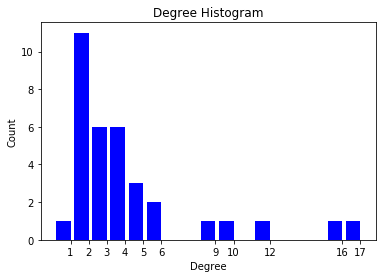

In [33]:
# Degree distribution
degree_sequence = sorted([d for n, d in G.degree()], reverse=True)  # degree sequence
# print "Degree sequence", degree_sequence
degreeCount = collections.Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())

fig, ax = plt.subplots()
plt.bar(deg, cnt, width=0.80, color='b')

plt.title("Degree Histogram")
plt.ylabel("Count")
plt.xlabel("Degree")
ax.set_xticks([d + 0.4 for d in deg])
ax.set_xticklabels(deg)

plt.show()

* Centrality Measures

In [34]:
# Degree centrality
# C(i) ~ k(i) (centrality of node i changes by degree of that node)
# Based on degree centrality, the more connection a node has, the more important that node is. Airport, citation and friendship are the cases that degree centrality works well
degreeCentrality = nx.degree_centrality(G)

In [35]:
# Closeness centrality
# This measure is calculated via C = 1/L(i) which L(i) denotes the average distance of node i to all the others. Collaboration networks is a case that closeness centrality works well 
# Closeness centrality doesn't span much
# Check Erdos-number and Bacon-number
closenessCentrality = nx.closeness_centrality(G)

In [36]:
# Betweenness centrality
# C(i) ~ # shortest paths between all pairs passing through node i
# Very large span for large networks
betweennessCentrality = nx.betweenness_centrality(G)

In [37]:
# Eigenvector centrality
# The philosophy underneath this centrality measure: Important nodes are connected to important nodes
# Eigen vector centrality is a recursive approach
eigenvectorCentrality = nx.eigenvector_centrality(G)

In [38]:
# Katz centrality
katzCentrality = nx.katz_centrality(G)

In [39]:
# Page Rank centrality
pagerankCentrality = nx.pagerank(G)

### Challenge 2
Compute the correlation between the introduced centrality measures over three datasets

* Community and Homophily

In [41]:
# The functions in this class are not imported into the top-level networkx namespace. You can access these functions by importing the networkx.algorithms.community module, then accessing the functions as attributes of community
# This class implemented Newman-Girvan method
# The other very popular community detection method is the Blondel method which is implemented in Gephi
from networkx.algorithms import community
communities_generator = community.girvan_newman(G)
top_level_communities = next(communities_generator)
next_level_communities = next(communities_generator)
communities = sorted(map(sorted, next_level_communities))

* Paths and geodesics

In [70]:
# In calculating the shortest path between nodes in a graph, a very important point is to know whether the graph is connected or disconnected. If it's a connected graph there is no problem, otherwise in disconnected graph, the shortest path algorithm should applied on the connected components
condition = nx.is_connected(G)
sourceNode = "1"
targetNode = "30"
if condition:
    print(nx.shortest_path_length(G, source=sourceNode, target=targetNode))
    print(nx.shortest_path(G, source=sourceNode, target=targetNode))
    print(list(nx.shortest_paths.all_shortest_paths(G, source=sourceNode, target=targetNode)))
    # A simple path is a path with no repeated nodes
    simplePaths = list(nx.simple_paths.all_simple_paths(G, source=sourceNode, target=targetNode))

3
['1', '3', '33', '30']
[['1', '3', '33', '30'], ['1', '9', '33', '30'], ['1', '32', '33', '30'], ['1', '9', '34', '30'], ['1', '14', '34', '30'], ['1', '20', '34', '30'], ['1', '32', '34', '30']]


* Cycle

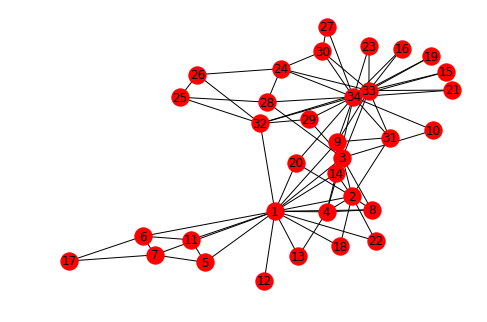

In [197]:
# First we visualize the graph
nx.draw(G, with_labels=True)
plt.show()

In [199]:
nx.cycle_basis(G)

[['6', '17', '7'],
 ['1', '6', '7'],
 ['1', '11', '6'],
 ['5', '11', '6', '7'],
 ['1', '5', '7'],
 ['9', '34', '32', '1'],
 ['14', '34', '32', '1'],
 ['20', '34', '32', '1'],
 ['29', '34', '32'],
 ['33', '34', '32'],
 ['2', '31', '34', '32', '1'],
 ['9', '31', '34'],
 ['33', '31', '34'],
 ['24', '30', '34'],
 ['27', '30', '34'],
 ['33', '30', '34'],
 ['3', '28', '34', '32', '1'],
 ['24', '28', '34'],
 ['25', '28', '34', '32'],
 ['26', '24', '34', '32'],
 ['33', '24', '34'],
 ['33', '23', '34'],
 ['33', '21', '34'],
 ['33', '19', '34'],
 ['33', '16', '34'],
 ['33', '15', '34'],
 ['3', '10', '34', '32', '1'],
 ['3', '33', '32', '1'],
 ['9', '33', '32', '1'],
 ['3', '29', '32', '1'],
 ['25', '26', '32'],
 ['2', '22', '1'],
 ['2', '20', '1'],
 ['2', '18', '1'],
 ['2', '14', '1'],
 ['3', '14', '1'],
 ['4', '14', '1'],
 ['4', '13', '1'],
 ['3', '9', '1'],
 ['2', '8', '1'],
 ['3', '8', '1'],
 ['4', '8', '1'],
 ['2', '4', '1'],
 ['3', '4', '1'],
 ['2', '3', '1']]

In [221]:
# Eulerian cycle
# An Eulerian circuit is a path that crosses every edge in G exactly once and finishes at the starting node.
EG = nx.Graph()
EG.add_edges_from([(1,2),(1,3),(2,3)])
if nx.is_eulerian(EG):
    for a  in nx.eulerian_circuit(EG):
        print(a)

(1, 3)
(3, 2)
(2, 1)


In [225]:
# Hamiltonian cycle
HG = nx.DiGraph()
HG.add_edges_from([(1,2),(2,3),(3,4),(4,1)])
nx.tournament.hamiltonian_path(HG)

[1, 2, 3, 4]

Maybe you noticed, the difference between hamiltonian and eulerian cycle is really small. An Euler path is a path that crosses every edge exactly once without repeating, if it ends at the initial vertex then it is Euler cycle. A Hamiltonian path passes through each vertex (note not each edge), exactly once, if it ends at the initial vertex then it is a Hamiltonian cycle

* Bipartite networks and their projections

### Erdos-Renyi random graphs - Scale Free Networks - Small World Networks

In [245]:
ERG = nx.erdos_renyi_graph(1000,0.2)
SFN = nx.scale_free_graph(1000)
SMW = nx.watts_strogatz_graph(1000,3,0.1)

### Challenge 3

Draw three graphs degree distribution with different parameters. Can you see any pattern in their distribution? Also, compare their average path length, average degree and clustering coefficient.

### Epidemiology

Epidemic processes are very important in both network science and its applications. The most common application is to study the was in which diseases progress in different network conditions, depending on their infectiousness and other properties. Typically such processes are modelled as a compartmented model of disease with conditional probabilities for moving between compartments (familiar to computer scientists as stochastic finite state machines)(from https://pythonhosted.org/epydemic/). 

There are quite a few compartmental models proposed by scholars. Among them we explore four models which are the most famous ones : SI, SIS, SIR and SEIR. Please note, networkx does not support epidemic modelling per se, and we need to install a new package called NDlib which is built on the top of networkx. For more information about this library please refer to http://ndlib.readthedocs.io/en/latest/index.html

In [254]:
import ndlib.models.ModelConfig as mc

In [261]:
#SI Model
# 0: Susceptible - 1: Infected
# SI assumes that if, during a generic iteration, a susceptible node comes into contact with an infected one, it becomes infected with probability β: once a node becomes infected, it stays infected (the only transition allowed is S→I)
# We set the initial set of infected nodes as 5% of the overall population and a probability of infection of 1%.

import ndlib.models.epidemics.SIModel as si

# Network topology
g = nx.erdos_renyi_graph(1000, 0.1)

# Model selection
model = si.SIModel(g)

# Model Configuration
cfg = mc.Configuration()
cfg.add_model_parameter('beta', 0.01)
cfg.add_model_parameter("percentage_infected", 0.05)
model.set_initial_status(cfg)

# Simulation execution
iterations = model.iteration_bunch(200)

In [262]:
#SIS Model
# 0: Susceptible - 1: Infected
# SIS assumes that if, during a generic iteration, a susceptible node comes into contact with an infected one, it becomes infected with probability beta, than it can be switch again to susceptible with probability lambda (the only transition allowed are S→I→S).
# we set the initial set of infected nodes as 5% of the overall population, a probability of infection of 1%, and a probability of recovery of 0.5%.

import ndlib.models.epidemics.SISModel as sis

# Network topology
g = nx.erdos_renyi_graph(1000, 0.1)

# Model selection
model = sis.SISModel(g)

# Model Configuration
cfg = mc.Configuration()
cfg.add_model_parameter('beta', 0.01)
cfg.add_model_parameter('lambda', 0.005)
cfg.add_model_parameter("percentage_infected", 0.05)
model.set_initial_status(cfg)

# Simulation execution
iterations = model.iteration_bunch(200)

In [263]:
#SIR Model
# 0: Susceptible - 1: Infected - 2: Removed
# SIR assumes that if, during a generic iteration, a susceptible node comes into contact with an infected one, it becomes infected with probability beta, than it can be switch to removed with probability gamma (the only transition allowed are S→I→R).
# we set the initial set of infected nodes as 5% of the overall population, a probability of infection of 1%, and a removal probability of 0.5%.

import ndlib.models.epidemics.SIRModel as sir

# Network topology
g = nx.erdos_renyi_graph(1000, 0.1)

# Model selection
model = sir.SIRModel(g)

# Model Configuration
cfg = mc.Configuration()
cfg.add_model_parameter('beta', 0.01)
cfg.add_model_parameter('gamma', 0.005)
cfg.add_model_parameter("percentage_infected", 0.05)
model.set_initial_status(cfg)

# Simulation execution
iterations = model.iteration_bunch(200)

In [264]:
#SEIR Model
# 0: Susceptible - 1: Infected - 2: Exposed - 3: Removed
# SEIR assumes that if, during a generic iteration, a susceptible node comes into contact with an infected one, it becomes infected after an exposition period with probability beta, than it can switch to removed with probability gamma (the only transition allowed are S→E→I→R).
# we set the initial set of infected nodes as % of the overall population, a probability of infection of 1%, a removal probability of 0.5% and an incubation period of 5% (e.g. 20 iterations)

import ndlib.models.epidemics.SEIRModel as seir

# Network topology
g = nx.erdos_renyi_graph(1000, 0.1)

# Model selection
model = seir.SEIRModel(g)

# Model Configuration
cfg = mc.Configuration()
cfg.add_model_parameter('beta', 0.01)
cfg.add_model_parameter('gamma', 0.005)
cfg.add_model_parameter('alpha', 0.05)
cfg.add_model_parameter("percentage_infected", 0.05)
model.set_initial_status(cfg)

# Simulation execution
iterations = model.iteration_bunch(200)

### Challenge 4

### Bipartite Graph

In [24]:
from networkx.algorithms import bipartite

In [27]:
B = nx.Graph()
# Add nodes with the node attribute "bipartite"
B.add_nodes_from([1, 2, 3, 4], bipartite=0)
B.add_nodes_from(['a', 'b', 'c'], bipartite=1)
B.add_edges_from([(1, 'a'), (1, 'b'), (2, 'b'), (2, 'c'), (3, 'c'), (4, 'a')])

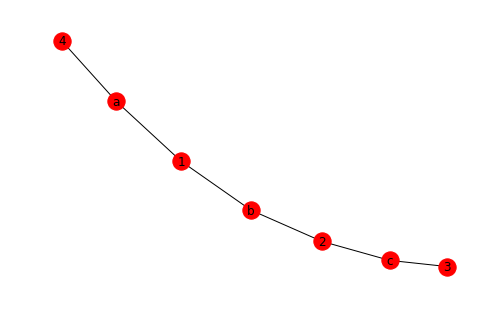

In [33]:
nx.draw(B, with_labels=True, pos=nx.fruchterman_reingold_layout(B))
plt.show()

In [34]:
bottom_nodes, top_nodes = bipartite.sets(B)

In [35]:
bottom_nodes

{1, 2, 3, 4}

In [36]:
top_nodes

{'a', 'b', 'c'}

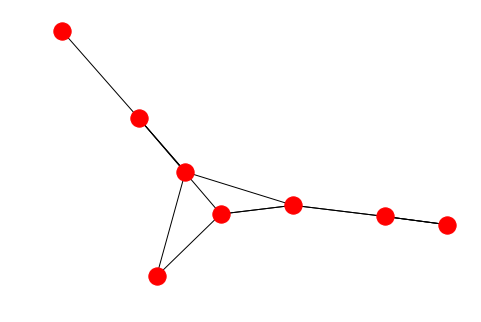

In [41]:
BN = nx.bipartite.random_graph(3,4, 0.15)
BN = nx.bipartite.configuration_model([2,3,4,5],[4,5,1,4])
nx.draw(BN)
plt.show()

### Assortivity

### Robustness

In [ ]:
# Easy experiment for checking the robustness of the network

#Edge removal
TG1 = nx.generators.erdos_renyi_graph(50,0.2)
for i in range(200):
    edges = list(TG1.edges())
    index = random.randint(0,len(edges)-1)
#     print(index, len(edges))
    TG1.remove_edge(edges[index][0],edges[index][1])
    print(len(edges), nx.is_connected(TG1))
    
#Node removal
TG2 = nx.generators.erdos_renyi_graph(50,0.1)
for i in range(40):
    nodes = list(TG2.nodes())
    index = random.randint(0, len(nodes))
    TG2.remove_node(nodes[index])
    print(len(nodes), nx.is_connected(TG2))

### K-Core

### Cliques

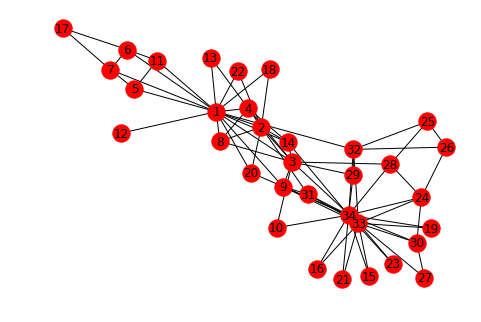

In [95]:
nx.draw(G, with_labels=True)
plt.show()

In [195]:
# Suppose we have afriendship graph, in this graph cliques are those subgraphs all the nodes know eacch other 
# In a clique with the size of n, all the nodes have the degree of n-1
# Further explanation: http://www.faculty.ucr.edu/~hanneman/nettext/C11_Cliques.html#subgraph
# In networkx, finding the largest clique in a graph is NP-complete problem, so most of the algorithms have an exponential running time

# The following function returns all the cliques (with different size) of a graph in an array 
allCliques = nx.enumerate_all_cliques(G)
# list(allCliques)

# The following function returns the clique number of the graph. The clique number of a graph is the size of the largest clique in the graph.
cliqueNum = nx.graph_clique_number(G)
# cliqueNum

#The following function returns maximal clique of a graph. For each node v, a maximal clique for v is a largest complete subgraph containing v. The largest maximal clique is sometimes called the maximum clique.
maximalCliques = nx.find_cliques(G)
# list(maximalCliques)

#The following function returns the number of maximal cliques in the graph.
maximalCliquesNum = nx.graph_number_of_cliques(G)

# The following function returns the number of maximal cliques for each node.
nodeMaximalClique = nx.number_of_cliques(G)


### Dynamic Networks

Based on the talk I had with Mason Porter (Oxford Mathematics Professor), dynamic network is a wrong term and instead of that we should replace it with temporal networks. In temporal networks both nodes and edges can change. New edges can appear, old edges can change(be remove or got bigger or smaller (in terms of weight)), new nodes appear, old nodes chages (be removed or got bigger or smaller)

To model temporal networks, we consider a time period and in each tick during this period we record the state of all elements. One of the best way to visualize temporal networks is Gephi but we need to give it the write input which has a special format. It is called gexf format. When we make a graph networkx can store it in this format, so to have a temporal networks, we create every snapshot of our network in networkx, then store that snapshot in gexf format. But still Gephi cannot identify the temporal dimension in the input and the created files need to be modified.

In [15]:
##### In the second line of each gexf file, there is this line of code:
########### <graph defaultedgetype="undirected" mode="static" name="">
##### and it should be replaced with the following line:
########### <graph mode="slice" defaultedgetype="directed" timerepresentation="timestamp" timestamp="2016">
##### The timestamp and edgetype should change due to the case

### Online Social Network

There are quite a few online social networks outside; however, we decided to work with Twitter network becasue (i) Despite its limitation (collecting data only from past seven days and getting only 1% of available data), Twitter is one of the few social networks that allows data collection, (ii) also, it's one of the most dynamic social networks which almost every social, political and economic topic will be reflected in it. 

In order to get data from Twitter, first you need to make a developer account. To do that you have to go this website https://apps.twitter.com/ and create an application (filling the form and explaining for what application you need to get Twitter API). After filling the form, go the the "Keys and Access Tokesn" and take four following codes: API Key, API Secret, Access Token, Access Token Secret.

In [3]:
API_Key = "A6cR7dFSJk9bY3oxw7XIq1tb7"
API_Secret = "Vl1EksqcdocG2vegbW2lUQPd9VBmlostZRJj6My4RHuAm3ePE0"
Access_Token = "975827149704847360-eZfeJgpFFq1EjUkoDSKwfbiW7h6baTN"
Access_Token_Secret ="WVRsGgy3Uu0uMFsLWr82zvPEQ3rsOq68Oh3XcnnNQ6HS4"

Twitter has two kind of API: (i) Search API which allows you to get access to historical data (not older than past 7 days), and (ii) Stream API which allows you to get access to the data that are currently comming to the Twitter. Here, we work with first type type of Twitter API, for working with second type of API, please refer to the files that comes with this notebook.
Also, for getting further information about these two kinds of API, please refer to http://140dev.com/twitter-api-programming-tutorials/aggregating-tweets-search-api-vs-streaming-api/

We can directly use Twitter API with HTTP request and related libraries in different programming languages, but becasue it is a fairly hard task and needs lots of efforts, programmers started writing something called Wrapper, which makes connection to the APIs very easy. For Twitter, there are quite a few wrapper in various programming languages. For Python two of the most popular APIs are Tweepy and Twython. Here, we used Tweepy

In [4]:
import tweepy

# Connecting to Twitter
auth = tweepy.auth.OAuthHandler(API_Key, API_Secret)
auth.set_access_token(Access_Token, Access_Token_Secret)
api = tweepy.API(auth)

In [5]:
# tweetObject = api.get_status(tweet.split("\t")[1], tweet_mode="extended")

In [ ]:
public_tweets = api.home_timeline()
for tweet in public_tweets:
    print(tweet.text)